In [1]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.layers as tfl
import pandas as pd
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!mkdir -p "/content/drive/My Drive/CIFAR10_models"

In [3]:
#Loading in dataset

(x_train_orig, y_train), (x_test_orig, y_test) = tf.keras.datasets.cifar10.load_data()

In [4]:
#Dimensions of matrices

print("X_train shape", x_train_orig.shape)
print("X_test shape", x_test_orig.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape (50000, 32, 32, 3)
X_test shape (10000, 32, 32, 3)
y_train shape (50000, 1)
y_test shape (10000, 1)


In [5]:
#Normalizing the input

x_train = x_train_orig / 255.
x_test = x_test_orig / 255.

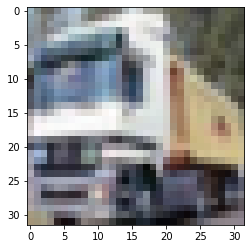

In [6]:
#Looking at our data

image_index = 1
plt.imshow(x_train[image_index])

In [39]:
#Designing the neural network architecture 

def conv_model(input_shape):

  Z0 = tf.keras.Input(shape = input_shape)
  Z1 = tfl.Conv2D(filters = 32, kernel_size= (3, 3), strides = (1, 1), padding = 'same')(Z0)
  A1 = tfl.ReLU()(Z1)
  A1 = tfl.BatchNormalization()(A1)
  Z1 = tfl.Conv2D(filters = 32, kernel_size= (3, 3), strides = (1, 1), padding = 'same')(A1)
  A1 = tfl.ReLU()(Z1)
  A1 = tfl.BatchNormalization()(A1)
  A1 = tfl.Dropout(0.25)(A1)
  P1 = tfl.MaxPool2D(pool_size = (2, 2))(A1)

  Z2 = tfl.Conv2D(filters = 64, kernel_size= (3, 3), strides = (1, 1), padding = 'same')(P1)
  A2 = tfl.ReLU()(Z2)
  A2 = tfl.BatchNormalization()(A2)
  Z2 = tfl.Conv2D(filters = 64, kernel_size= (3, 3), strides = (1, 1), padding = 'same')(A2)
  A2 = tfl.ReLU()(Z2)
  A2 = tfl.BatchNormalization()(A2)
  A2 = tfl.Dropout(0.25)(A2)
  P2 = tfl.MaxPool2D(pool_size = (2, 2))(A2)

  Z3 = tfl.Conv2D(filters = 128, kernel_size= (3, 3), strides = (1, 1), padding = 'same')(P2)
  A3 = tfl.ReLU()(Z3)
  A3 = tfl.BatchNormalization()(A3)
  Z3 = tfl.Conv2D(filters = 128, kernel_size= (3, 3), strides = (1, 1), padding = 'same')(A3)
  A3 = tfl.ReLU()(Z3)
  A3 = tfl.BatchNormalization()(A3)
  A3 = tfl.Dropout(0.25)(A3)
  P3 = tfl.MaxPool2D(pool_size = (2, 2))(A3)

  F = tfl.Flatten()(P3)
  D1 = tfl.Dense(units = 128, activation = 'relu')(F)
  D1 = tfl.Dropout(0.5)(D1)
  outputs = tfl.Dense(units = 10, activation = 'softmax')(D1)
  model = tf.keras.Model(inputs = Z0, outputs = outputs)
  return model
                               

In [40]:
#Compiling the model 

model = conv_model((32, 32, 3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [41]:
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 re_lu_25 (ReLU)             (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_25 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_26 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 re_lu_26 (ReLU)             (None, 32, 32, 32)        0         
                                                           

In [ ]:
#Training the model

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

history = model.fit(train_dataset, epochs = 5, validation_data = test_dataset)

Epoch 1/10
1563/1563 [==============================] - 451s 287ms/step - loss: 1.7885 - accuracy: 0.3306 - val_loss: 1.5812 - val_accuracy: 0.4635
Epoch 2/10
1563/1563 [==============================] - 455s 291ms/step - loss: 1.3443 - accuracy: 0.5120 - val_loss: 1.1117 - val_accuracy: 0.6326
Epoch 3/10
1563/1563 [==============================] - 454s 290ms/step - loss: 1.0904 - accuracy: 0.6229 - val_loss: 1.1467 - val_accuracy: 0.6538
Epoch 4/10
1563/1563 [==============================] - 451s 288ms/step - loss: 0.9412 - accuracy: 0.6834 - val_loss: 1.2086 - val_accuracy: 0.6685
Epoch 5/10
1563/1563 [==============================] - 452s 289ms/step - loss: 0.8340 - accuracy: 0.7209 - val_loss: 1.0493 - val_accuracy: 0.7118
Epoch 6/10
1563/1563 [==============================] - ETA: 0s - loss: 0.7382 - accuracy: 0.7574

In [ ]:
#model.save("/content/drive/My Drive/CIFAR10_models/Model_1.h5")

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epoch')]

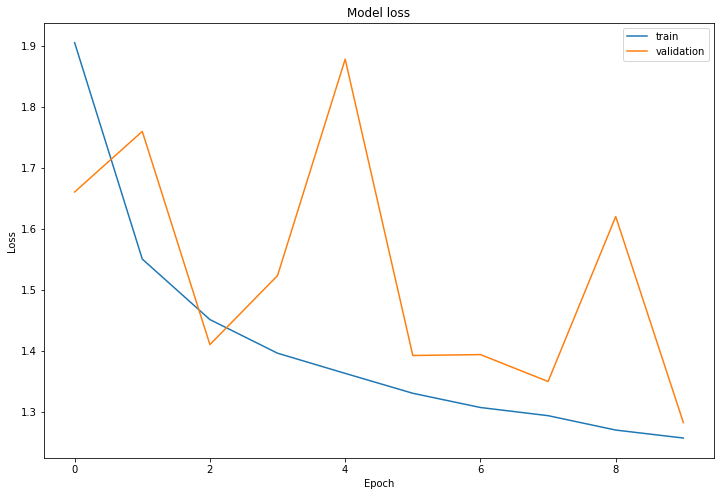

In [15]:
#Training statistics 

df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')